FIT5196 Assessment 2

Student Name: Jiaming Ren

Student ID: 32209436

Date: 28/09/2021

Version: 2.0

Environment: Python 3.8.5 and Anaconda 4.10.3 (64-bit)

Libraries used:

- re (for regular expression, included in Anaconda Python 3.8)
- os (for file operation, included in Anaconda Python 3.8)
- nltk (Natural Language Toolkit, included in Anaconda Python 3.8)
- nltk.collocations (for finding bigrams, included in Anaconda Python 3.8)
- nltk.tokenize (for tokenization, included in Anaconda Python 3.8)
- nltk.corpus (for stop words, not included in Anaconda)
- sklearn (for machine learning, included in Anaconda)

# Introduction
**1. Dirty Data (30%):**

90% or more of the errors are fixed accurately.

**2. Outliers (15%):**

90% or more of the outliers are removed.

**3. Missing Values (15%):**

90% or more of the missing values are imputed correctly.

**4. Methodology (25%):**

The report has demonstrated a good solution in a proper way. No error or only minor errors are found in the methodology. The methodology consists of all required steps for the tasks, and produces output with HD scores.

**4. Documentation (15%):**

The report has proper sections and subsections (e.g. introduction, methodology, conclusion,...). The methodology is explained properly and the code is well commented.


# Table 1
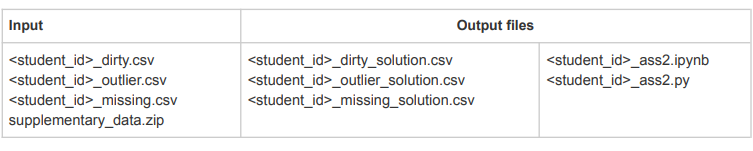

# Table 2 
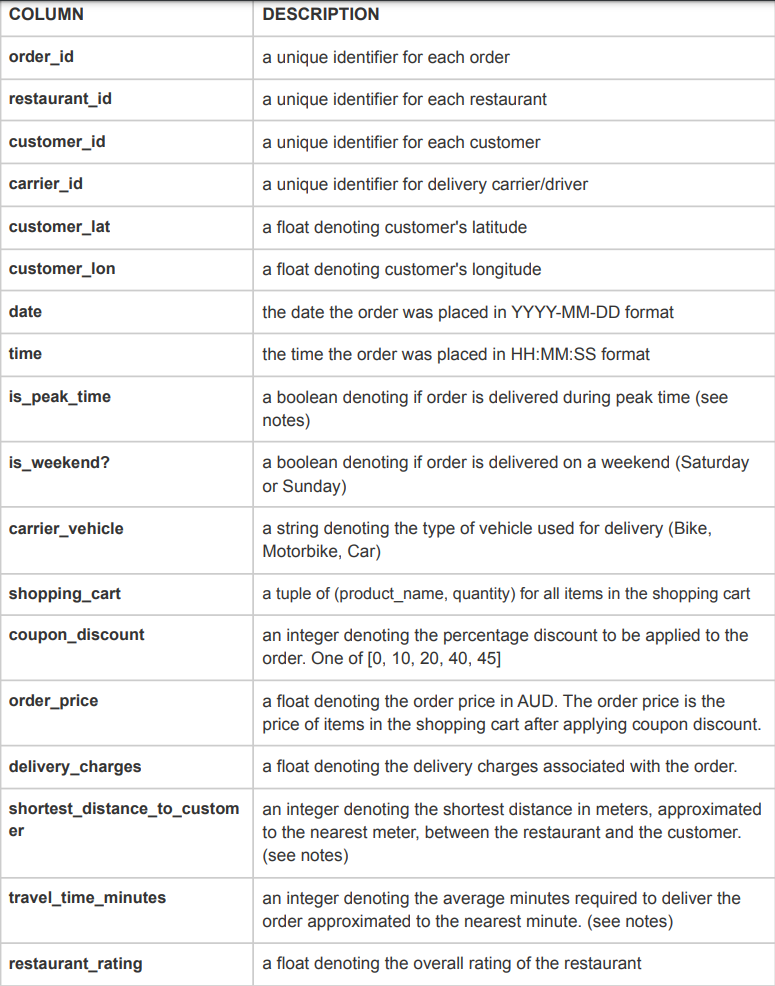

## Import Libraries

In [1]:
#pip install nltk==3.4.5

In [2]:
#Basic scientific python libs
import pandas as pd
#import numpy as np
import numpy as np
#import regular expression
import re
#import datetime
from datetime import datetime
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline

## Missing Data (missing.csv)

First, i will look into the dataset by using infor(), descirbe() and isnull().sum() methods.

In [3]:
missing_df = pd.read_csv('32209436_missing.csv')
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   restaurant_id                  500 non-null    object 
 2   customer_id                    500 non-null    object 
 3   carrier_id                     500 non-null    object 
 4   customer_lat                   500 non-null    float64
 5   customer_lon                   500 non-null    float64
 6   date                           500 non-null    object 
 7   time                           500 non-null    object 
 8   is_peak_time                   500 non-null    int64  
 9   is_weekend                     500 non-null    int64  
 10  carrier_vehicle                500 non-null    object 
 11  shopping_cart                  500 non-null    object 
 12  coupon_discount                500 non-null    int

In [4]:
missing_df.describe()

,customer_lat,customer_lon,is_peak_time,is_weekend,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,350.000000,500.000,0.0,350.000000
mean,-37.812000,144.967193,0.150000,0.286000,15.560000,81.721874,3797.557143,12.308,NaN,4.436080
std,0.007664,0.021131,0.357429,0.452342,18.277158,39.957637,2227.186137,9.364,NaN,1.102050
min,-37.828216,144.910992,0.000000,0.000000,0.000000,11.176000,13.000000,0.000,NaN,2.295800
25%,-37.818443,144.952621,0.000000,0.000000,0.000000,49.408500,2078.500000,6.000,NaN,3.585600
50%,-37.812169,144.964245,0.000000,0.000000,10.000000,75.970000,3231.500000,10.000,NaN,4.244350
75%,-37.805473,144.982322,0.000000,1.000000,40.000000,106.934500,5255.250000,16.000,NaN,5.176675
max,-37.788784,145.020920,1.000000,1.000000,45.000000,228.170000,11295.000000,52.000,NaN,8.179300


In [5]:
missing_df.describe(include=['O']) #'O' for objects

,order_id,restaurant_id,customer_id,carrier_id,date,time,carrier_vehicle,shopping_cart
count,500,500,500,500,500,500,500,500
unique,500,5,492,479,266,270,3,488
top,ORD295773,REST1149,CUST03581,COUR4455,2020-12-04,23:00:39,Bike,"[('babycorn manchurian', 2), ('mango salad', 1)]"
freq,1,114,3,2,7,5,179,3


In [6]:
missing_df.isnull().sum()

order_id                           0
restaurant_id                      0
customer_id                        0
carrier_id                         0
customer_lat                       0
customer_lon                       0
date                               0
time                               0
is_peak_time                       0
is_weekend                         0
carrier_vehicle                    0
shopping_cart                      0
coupon_discount                    0
order_price                        0
shortest_distance_to_customer    150
travel_time_minutes                0
restaurant_rating                500
delivery_charges                 150
dtype: int64

From above outputs, i can observe that there are 500 x 18 records and there are many missing values in shortest_distance_to_customer, restaurant_rating, delivery_charges columns.

I will look into these columns one by one

First, I will look into the shortest_distance_to_customer column.

I will get nodes and edges data from supplement documents and use the Dijkstra Algorithm to calculate the shortest distance.

I will print out some rows for nodes and edges dataframes

### 1. shortest_distance_to_customer

In [7]:
#load nodes and edges df
nodes = pd.read_csv(r'supplementary_data/nodes.csv')
edges = pd.read_csv(r'supplementary_data/edges.csv')

In [8]:
nodes.head()

,node,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


In [9]:
edges.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


To find the shortest distance, i will use Djikstra algorithm implementation found in networkx python package.

first i will loop through the rows of the edge list and add each edge and its corresponding attributes to graph g

might need install the networkx package first

In [10]:
#pip install networkx 

In [11]:
import networkx as nx
#initial empty graph
g = nx.DiGraph()
#Loop through the rows of the edge list and add each edge
#and its corresponding attributes to graph g
array = edges.apply(lambda r : (int(r.u),int(r.v),int(r['distance(m)'])),axis =1)
g.add_weighted_edges_from(array)
print(array)

0          (711327755, 711332946, 58)
1           (711327755, 55725841, 15)
2         (711327755, 711327760, 165)
3           (711327756, 703557073, 4)
4           (711327756, 711332946, 8)
                     ...             
42219    (1449431614, 1449431244, 16)
42220    (1449431614, 1449431574, 17)
42221     (1449431622, 60095777, 196)
42222    (1449431623, 1449431622, 19)
42223    (1449431623, 1449355158, 23)
Length: 42224, dtype: object


In [12]:
# examine the funciton, get distance between 711327755 and 711332946
dis = nx.dijkstra_path_length(g,3419354750    ,6167417969)
print("distance: ", dis)

distance:  566


Now, From above output, i successfully get the distance for each nod to each node. I will use the data i have to fillin all missing value.

the idea is that by figuring out the nearest distance between the longitude and latitude of each restaurant and customer and the longitude and latitude of the node

first, i will store each nodes' lat and lon and node id in a dict. Then, use the lon and lat for restaurant corresponding with data in the node dict to find node id for each restaurant and i will use this way to find customers' node


In [13]:
#create a dict that store lat and lon for each node
node_dict = {}
#iterate each rows 
for i,r in nodes.iterrows():
    node_dict[(round(r.lat,7),round(r.lon,7))] = int(r.node)
    
#find restaurant nodes
rest_data = pd.read_csv(r'./supplementary_data/restaurant_data_student.csv')
restaurant_node = rest_data.apply(lambda r: (r.restaurant_id,node_dict[(round(r.lat,7),round(r.lon,7))]),axis =1)
dict_restaurant_node = dict(restaurant_node.values)

#assign customer node and restaurant node to its corresponding row
missing_df['customer_node'] = missing_df.apply(lambda r: node_dict[(round(r.customer_lat,7),round(r.customer_lon,7))],axis=1)

missing_df['restaurant_node'] = missing_df.apply(lambda r: dict_restaurant_node[r.restaurant_id],axis=1)

#iterate each row in the df
for i,r in missing_df.iterrows():
    try:
        #try to find the distance between two nodes
        dis = nx.dijkstra_path_length(g,r.restaurant_node,r.customer_node)
    except:
        #if two nodes are not reachable, make the distance to 0
        dis = 0 
    # replace original data
    missing_df.loc[i ,'shortest_distance_to_customer'] = dis
missing_df.drop(['customer_node','restaurant_node'],axis =1,inplace=True)

In [14]:
missing_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
0,ORD148435,REST0070,CUST11388,COUR2617,-37.809367,144.971960,2020-06-30,04:32:58,0,0,Bike,"[('laksa soup', 1), ('veg fritters', 1), ('cof...",10,31.005,573.0,3,NaN,2.7040
1,ORD313036,REST0538,CUST00715,COUR4316,-37.804668,144.935219,2020-02-10,07:50:46,0,0,Motorbike,"[('roti', 3), ('biryani', 1)]",0,86.050,8518.0,17,NaN,4.0028
2,ORD296346,REST0538,CUST04030,COUR3575,-37.819572,144.982696,2020-06-30,11:16:29,0,0,Car,"[('paratha', 2), ('roti', 2)]",40,44.820,4999.0,12,NaN,NaN
3,ORD314477,REST0070,CUST08198,COUR2279,-37.816808,145.007359,2020-11-26,08:30:19,0,0,Car,"[('veg fritters', 3), ('babycorn manchurian', ...",40,106.776,3910.0,9,NaN,3.5635
4,ORD343136,REST0538,CUST05169,COUR1314,-37.823700,144.956314,2020-08-25,04:32:58,0,0,Motorbike,"[('biryani', 3), ('chicken grill', 3), ('roti'...",40,121.230,6934.0,14,NaN,NaN


In [15]:
print("total missing value: ",missing_df['shortest_distance_to_customer'].isnull().sum())

total missing value:  0


From above output, we can see that all missing value are filled

Now, i will work on the restaurant rating column. The restaurant rating column is the only column that miss all values.

Rating for a given restaurant is calculated based on the restaurant reviews_list as follows:
- SentimentIntensityAnalyzer from nltk.sentiment.vader is used to obtain a sentiment compound polarity_score for each review, then all the scores are averaged to obtain an average compound polarity score (avg_polarity) for that restaurant.
- The following formula is used to calculate the rating: 10 * (avg_polarity + 0.9623) / (1.9533)

the csv was preload as rest_data

In [16]:
rest_data.head()

,restaurant_id,restaurant_name,menu_items,reviews_list,lat,lon,rest_nodes
0,REST0000,jalsa,"['biryani', 'butter chicken', 'dal makhani', '...",['* great place for families* mughal theme foo...,-37.821295,144.987506,1445473970
1,REST0001,spice elephant,"['chicken biryani', 'chocolate nirvana', 'dum ...",['a decent place for a family lunch or dinner....,-37.805811,144.938170,3555788741
2,REST0002,san churro cafe,"['cannelloni', 'churros', 'hot chocolate', 'mi...","[""rated went there for a quick bite with frien...",-37.815720,144.950524,579489323
3,REST0003,timepass dinner,"['jeera rice', 'kadhai paneer', 'onion rings',...","[""came over here with family unexpectedly on v...",-37.812461,144.953430,5002595078
4,REST0004,onesta,"['apple pie', 'bacon pizza', 'banana smoothie'...",['rated best place for pizzas. we had bacon wr...,-37.821704,145.009534,331417007


I will use the SentimentIntensityAnalyzer from nltk.sentiment.vader library to calculate the average of each review set, as well as the restaurant's ratings. By doing that, i will extract all comments and use the **SentimentIntensityAnalyzer** method.

might need download nltk.download('vader_lexicon')

### 2. Rating

In [17]:
#import nltk
#nltk.download('vader_lexicon')

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def Score(s):
    #extract comments
    comments = re.findall(r"([\'\"])(.*?)\1",s)
    
    #initialize analyzer
    analyzer = SentimentIntensityAnalyzer()
    # store result
    results = []
    
    #obtain a sentiment compound polarity_score for each review, 
    #then all the scores are averaged to obtain an average 
    #compound polarity score (avg_polarity) for that restaurant.
    for c in comments:
        a = analyzer.polarity_scores(c[1])
        results.append(a['compound'])
    avg_polarity =np.mean(results)
    
    # return score
    return round(10*(avg_polarity + 0.9623) / (1.9533),2)

In [19]:
# get each restaurant id with its scores
rest_rating = rest_data.apply(lambda r: (r.restaurant_id,Score(r.reviews_list)),axis =1)
rating = dict(rest_rating.values)
#fill in average rating
missing_df['restaurant_rating'] = missing_df.apply(lambda r : rating[r.restaurant_id],axis=1)

In [20]:
print("total missing value: ",missing_df['restaurant_rating'].isnull().sum())

total missing value:  0


In [21]:
missing_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
0,ORD148435,REST0070,CUST11388,COUR2617,-37.809367,144.971960,2020-06-30,04:32:58,0,0,Bike,"[('laksa soup', 1), ('veg fritters', 1), ('cof...",10,31.005,573.0,3,8.72,2.7040
1,ORD313036,REST0538,CUST00715,COUR4316,-37.804668,144.935219,2020-02-10,07:50:46,0,0,Motorbike,"[('roti', 3), ('biryani', 1)]",0,86.050,8518.0,17,8.79,4.0028
2,ORD296346,REST0538,CUST04030,COUR3575,-37.819572,144.982696,2020-06-30,11:16:29,0,0,Car,"[('paratha', 2), ('roti', 2)]",40,44.820,4999.0,12,8.79,NaN
3,ORD314477,REST0070,CUST08198,COUR2279,-37.816808,145.007359,2020-11-26,08:30:19,0,0,Car,"[('veg fritters', 3), ('babycorn manchurian', ...",40,106.776,3910.0,9,8.72,3.5635
4,ORD343136,REST0538,CUST05169,COUR1314,-37.823700,144.956314,2020-08-25,04:32:58,0,0,Motorbike,"[('biryani', 3), ('chicken grill', 3), ('roti'...",40,121.230,6934.0,14,8.79,NaN


From above outputs, i can confirm that all rating is filled.

Last one is the delivery_charges column.
Delivery charge is calculated using a linear model which depends on the following factors:
- Travel time between restaurant and customer.
- Whether the delivery occurred during a peak period.
- Whether the delivery occurred during a weekend.
- The restaurant rating

for this problem, i will use the sklearn.linear_model.LinearRegression for solving the linear
mode

first, i will filter all non-null rows to train the model.

'travel_time_minutes','is_peak_time','is_weekend','restaurant_rating' are factors that affect charges

### 3. delivery_charges

In [22]:
#import library
from sklearn.linear_model import LinearRegression
#get all 
non_null = missing_df[missing_df.delivery_charges.isnull()==False]
#implement linear regression
linear_re = LinearRegression()
x = non_null[['travel_time_minutes','is_peak_time','is_weekend','restaurant_rating']]
y = non_null['delivery_charges']
linear_re.fit(x,y)

print(linear_re.score(x,y))

0.9672061403099932


Now, the model is trained. filter all rows with missing values and fill in

In [23]:
#df with only null rows
all_null = missing_df[missing_df.delivery_charges.isnull()]
#iterate over all 
for i,r in all_null.iterrows():
    #select facotrs
    factors = r[['travel_time_minutes','is_peak_time','is_weekend','restaurant_rating']]
    #calculate charges
    charges = linear_re.predict(factors.values.reshape(1,-1))
    #fill in charges
    missing_df.loc[i,'delivery_charges']  = round(charges[0],4)
print("total missing value: ",missing_df['delivery_charges'].isnull().sum())

total missing value:  0


from above output, i can confirm that all missing value in delievery_charges are filled

In [24]:
missing_df.isnull().sum()

order_id                         0
restaurant_id                    0
customer_id                      0
carrier_id                       0
customer_lat                     0
customer_lon                     0
date                             0
time                             0
is_peak_time                     0
is_weekend                       0
carrier_vehicle                  0
shopping_cart                    0
coupon_discount                  0
order_price                      0
shortest_distance_to_customer    0
travel_time_minutes              0
restaurant_rating                0
delivery_charges                 0
dtype: int64

from above output, i can confirm that all missing value in missing_df are filled

last step, i will output the file as csv format

In [25]:
#output the file
missing_df.to_csv(r'32209436_missing_solution.csv',index=False)

## Outlier data (outlier.csv)

In [26]:
#read_df
outlier_df = pd.read_csv(r'32209436_outlier.csv')
outlier_df.head(5)

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges
0,ORD268962,REST1563,CUST02694,COUR4462,-37.799298,144.970104,2020-08-22,20:26:22,0,1,Car,"[('chicken biryani', 2), ('garlic naan', 1), (...",0,53.310,1716,4,4.3537
1,ORD076727,REST1563,CUST04176,COUR2507,-37.823687,144.986820,2020-05-27,08:34:17,0,0,Bike,"[('dal makhani', 2), ('chicken biryani', 2), (...",40,67.926,2121,11,3.7257
2,ORD012646,REST0538,CUST09631,COUR3036,-37.812639,144.973583,2020-11-26,05:04:36,0,0,Bike,"[('roti', 1), ('chicken curry', 3)]",10,81.909,5252,26,5.3404
3,ORD328248,REST0172,CUST02111,COUR1807,-37.803982,145.007587,2020-07-03,07:50:46,0,0,Motorbike,"[('dahi aloo puri', 2), ('sev puri', 3), ('cha...",0,147.200,9176,18,4.4184
4,ORD277030,REST0172,CUST10839,COUR4856,-37.801216,144.962985,2020-10-21,00:51:25,0,0,Car,"[('sev puri', 3), ('chaat', 2), ('vada pav', 2)]",0,135.320,5188,12,4.2944


In [27]:
outlier_df['delivery_charges'].describe()

count    500.000000
mean       4.502354
std        1.241348
min        1.448300
25%        3.665525
50%        4.314800
75%        5.188000
max       10.151850
Name: delivery_charges, dtype: float64

First, i will use boxpot from matplotlib to investigate outliers

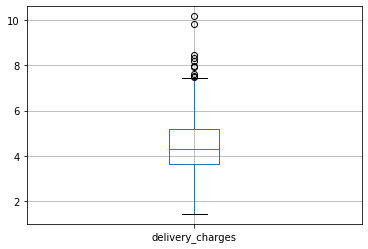

In [28]:
bp = outlier_df.boxplot(column=['delivery_charges'])

In [29]:
# We can see a few of delivery_charges above 9, then something around 10, look at the outliers:
outlier_df[outlier_df['delivery_charges']>9]

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges
110,ORD024096,REST0538,CUST13764,COUR0937,-37.813930,144.957002,2020-11-14,17:04:36,0,1,Bike,"[('chicken grill', 2), ('chicken curry', 3), (...",20,133.120,6591,33,10.15185
203,ORD126695,REST1563,CUST00112,COUR0251,-37.804531,144.935052,2020-05-18,18:15:49,1,0,Bike,"[('murgh ghee roast', 3), ('bamboo biryani', 1)]",45,22.082,4002,20,9.83370


it seems that there are many extreme values in 'delivery_charges'

next, i will import sns to plot a heat map

<AxesSubplot:>

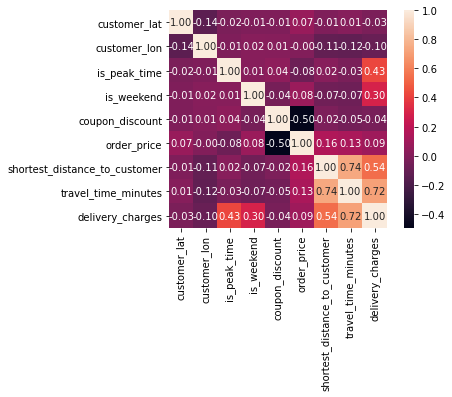

In [30]:
corr = outlier_df.corr()
sns.heatmap(corr,cbar=True,annot=True,square=True,fmt='.2f')

from above heat map, we can observe that is_peak_time, is_weekend has a moderate strong relationship with charges


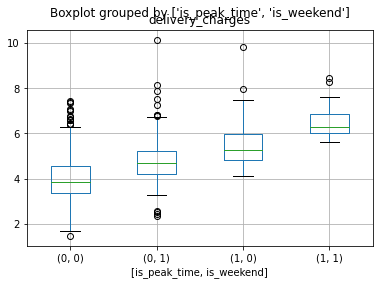

In [31]:
#left two plot is for is_peak_time (0,1), and right plot is for
#is_weekend(0,1)
bp = outlier_df.boxplot(column=['delivery_charges'], \
                        by = ['is_peak_time','is_weekend'])

I will use iqr to remove outlier.

In [32]:
Q1 = outlier_df.delivery_charges.quantile(0.25)
Q3 = outlier_df.delivery_charges.quantile(0.75)
IQR = Q3-Q1

lower = outlier_df[outlier_df["delivery_charges"] < Q1-1.5*IQR]
upper = outlier_df[outlier_df["delivery_charges"] > Q3+1.5*IQR]


#delete data that below lower and and greater than upper
outlier_df.drop(lower.index, inplace = True)
outlier_df.drop(upper.index, inplace = True)

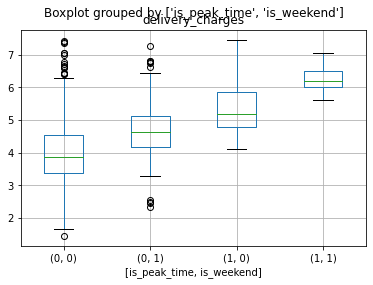

In [33]:
bp = outlier_df.boxplot(column=['delivery_charges'], \
                        by = ['is_peak_time','is_weekend'])

from above output, all outliers for when in peak time is_weekend attributes are removed.

next i will remove remaing outliers when not in peak time.

In [34]:
#out put file
outlier_df.to_csv(r'32209436_outlier_solution.csv',index=False)

## Dirty data (dirty.csv)
### Load the data using Pandas Library
I will inspect the file to find and fix Anomalies:
1. Syntactic Anomalies: lexical errors, domain format errors, syntactical error and irregularities

2. Semantic Anomalies: Integrity constraint violations, contradictions, duplicates and invalid tuples

3. Coverage Anomalies: Coverage anomalies are categorized as: missing values and missing tuples

inspect the file and figure out the file format
1. load dataset 
2. the number of columns
3. the numer of rows
4. the data type of each attributes

In [35]:
#load the 32209436_dirty.csv dataset
dirty_data = pd.read_csv('32209436_dirty.csv')

#check dimension
print("rows: " + str(dirty_data.shape[0])+" columns: " + str(dirty_data.shape[1]))

rows: 500 columns: 18


In [36]:
dirty_data.head(10) #inspect few rows

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
0,ORD059161,REST0538,CUST05463,COUR2457,-37.813442,144.965422,2020-09-09,15:57:21,0,0,Motorbike,"[('chicken grill', 1), ('chicken curry', 1)]",0,47.350,5965,12,8.79,3.9726
1,ORD347678,REST0538,CUST11804,COUR3087,-37.801122,144.962719,2020-12-13,11:32:18,0,1,Car,"[('roti', 3), ('chicken curry', 3), ('biryani'...",20,156.104,6283,15,7.03,5.0109
2,ORD172792,REST0538,CUST00556,COUR2135,-37.821421,144.963925,2020-07-21,04:36:55,0,0,Motorbike,"[('chicken grill', 2), ('paratha', 3), ('masal...",0,98.120,6181,12,7.03,3.9546
3,ORD171343,REST0172,CUST00156,COUR4090,-37.814129,145.004671,2020-07-08,17:44:10,0,0,Car,"[('panipuri', 3), ('masala poori', 1)]",40,55.506,8528,20,8.72,4.5482
4,ORD201323,REST0172,CUST11938,COUR1646,-37.801516,144.980245,2020-07-26,06:23:44,0,1,Motorbike,"[('vada pav', 1), ('masala poori', 3)]",10,75.006,6534,13,6.98,4.5854
5,ORD148701,REST1149,CUST01631,COUR0359,-37.815091,145.006010,2020-02-17,06:00:00,0,0,Bike,"[('sandwiches', 2), ('masala tea', 1)]",10,56.502,3145,16,5.58,4.6830
6,ORD006977,REST0538,CUST07664,COUR4748,-37.814237,144.937240,2020-05-04,17:36:15,0,0,Motorbike,"[('chicken curry', 2), ('chicken grill', 3)]",40,71.574,8752,18,7.03,4.7934
7,ORD336133,REST0172,CUST13240,COUR4930,-37.820958,144.976680,2020-11-05,14:38:14,0,0,Motorbike,"[('vada pav', 3), ('chaat', 2), ('dahi aloo pu...",40,81.210,6230,12,6.98,3.9542
8,ORD204664,REST0070,CUST10216,COUR0165,-37.799007,144.969993,2020-07-12,07:46:48,0,1,Bike,"[('coffee', 3), ('mango salad', 2)]",40,22.524,1605,8,8.72,4.6335
9,ORD222047,REST0538,CUST12220,COUR2996,144.941573,-37.820624,2020-03-27,05:36:15,0,0,Bike,"[('roti', 2), ('masala papad', 2), ('chicken c...",40,74.340,8290,41,7.03,6.7855


From the dataframe just print, we can observe variables types in the dataframe

**Categorical variables:** 

order_id, restaurant_id, customer_id, carrier_id,is_peak_time, is_weekend, carrier_vehicle

**Ordinal variables:**

coupon_discount

**Continuous variables:**

customer_lat, customer_lon,date, time, order_price, shortest_distance_to_customer, travel_time_minutes, delivery_charges

**Discrete variables:**

restaurant_rating	

There are 18 columns in the **dirty.csv**. Now, lets see how many data 

In [37]:
#use the get_dtype_counts() method to count total data type
#for the dataframe
dirty_data.dtypes.value_counts()

object     8
int64      5
float64    5
dtype: int64

Now, lets check the dirty_data dataframe info

In [38]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   restaurant_id                  500 non-null    object 
 2   customer_id                    500 non-null    object 
 3   carrier_id                     500 non-null    object 
 4   customer_lat                   500 non-null    float64
 5   customer_lon                   500 non-null    float64
 6   date                           500 non-null    object 
 7   time                           500 non-null    object 
 8   is_peak_time                   500 non-null    int64  
 9   is_weekend                     500 non-null    int64  
 10  carrier_vehicle                500 non-null    object 
 11  shopping_cart                  500 non-null    object 
 12  coupon_discount                500 non-null    int

Use the .describe() method to check out the numerical valeus across the samples

In [39]:
dirty_data.describe()

,customer_lat,customer_lon,is_peak_time,is_weekend,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,-35.619408,142.774601,0.170000,0.260000,13.690000,83.33270,3903.888000,12.188000,7.611820,4.475903
std,19.921717,19.922298,0.376009,0.439074,17.082668,39.29364,2184.686232,9.086351,1.072714,1.139902
min,-37.827954,-37.825016,0.000000,0.000000,0.000000,12.19200,8.000000,0.000000,5.580000,2.676200
25%,-37.818903,144.952255,0.000000,0.000000,0.000000,53.08650,2072.000000,5.000000,6.980000,3.590375
50%,-37.813345,144.965471,0.000000,0.000000,0.000000,79.27800,3575.500000,10.000000,7.030000,4.298800
75%,-37.805560,144.983428,0.000000,1.000000,20.000000,108.22250,5354.250000,16.000000,8.720000,5.094100
max,145.011931,145.019314,1.000000,1.000000,45.000000,205.56000,10207.000000,51.000000,9.120000,8.557200


The observation tells us that:
- is_peak_time is a categorical feature with 0 or 1 values. Most customers (>75%) did order during peak time
- is_weekend is a categorical feature with 0 or 1 values. nearly 30% customers use order during weekend.
- coupon_discount is a ordinal feature that in a order of [0, 10, 20, 40, 45]. nearly 30% coupons are 20.
- The min order price is 12.192 and the max price is 205.56
- the min shortest_distance_to_customer is 8 meters, which basically means the customer lives next door to the resturant.
- The min travel_time_minutes is 0 

Distribution of the categorical variables

In [40]:
dirty_data.describe(include=['O'])

,order_id,restaurant_id,customer_id,carrier_id,date,time,carrier_vehicle,shopping_cart
count,500,500,500,500,500,500,500,500
unique,500,5,495,480,282,272,6,490
top,ORD211347,REST0172,CUST13287,COUR4330,2020-09-30,16:40:52,Motorbike,"[('dahi aloo puri', 3), ('bhel puri', 1)]"
freq,1,118,2,3,7,6,171,2


What the table above tells us:
- the restaurant_id has 5 possible values (count != unique)
- each order id is unique
- the customer id has 495 possible values from 500 total counts (count != unique)
- carrier id has 480 possible values from 500 counts (count != unique)
- carrier vehicle has 6 possible values (count != unique)

## Identify Syntactical Anomalies
In this section, we will demonstrate how to audit the dat to identify some syntactical errors:
- lexical errors
- domain format errors
- syntactical error
- irregularities





### 1. Lon & Lat

First, lets check the spread of lat and lon by using the method describe()

In [41]:
dirty_data[["customer_lat", "customer_lon"]].describe()

,customer_lat,customer_lon
count,500.000000,500.000000
mean,-35.619408,142.774601
std,19.921717,19.922298
min,-37.827954,-37.825016
25%,-37.818903,144.952255
50%,-37.813345,144.965471
75%,-37.805560,144.983428
max,145.011931,145.019314


from above output

lat:
- min: -37.827954
- max：145.011931

lon:
- min: -37.825016
- max：145.019314

it is a Melbourne based data, which is why they should have a similar range.

lets dive into the data find if there are misplaced data

In [42]:
# data that latitude > -30
latitude = dirty_data[dirty_data["customer_lat"] > (-30)]
latitude

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
9,ORD222047,REST0538,CUST12220,COUR2996,144.941573,-37.820624,2020-03-27,05:36:15,0,0,Bike,"[('roti', 2), ('masala papad', 2), ('chicken c...",40,74.340,8290,41,7.03,6.7855
89,ORD160954,REST1563,CUST07573,COUR3257,144.948488,-37.817915,2020-08-22,10:36:55,0,1,Motorbike,"[('murgh ghee roast', 2), ('garlic naan', 2)]",20,27.424,2537,5,9.12,4.1481
171,ORD218122,REST0538,CUST07798,COUR1826,144.987989,-37.800902,2020-04-02,15:29:40,0,0,Bike,"[('paratha', 3), ('biryani', 2), ('roti', 2)]",0,125.040,3979,20,8.79,4.5014
283,ORD142117,REST1149,CUST10193,COUR4058,144.969579,-37.821351,2020-06-04,14:30:19,0,0,Car,"[('chicken sandwich', 2), ('poha', 1), ('coffe...",40,79.122,1561,4,5.58,3.4088
297,ORD179645,REST1563,CUST12104,COUR3038,145.011931,-37.825016,2020-02-09,08:14:30,0,1,Motorbike,"[('garlic naan', 1), ('chicken biryani', 1)]",45,13.657,4149,8,9.12,4.5693
488,ORD104211,REST0172,CUST07483,COUR4458,144.929461,-37.803058,2020-10-12,12:27:41,1,0,Motorbike,"[('panipuri', 3), ('vada pav', 1), ('chaat', 3)]",45,82.682,3916,8,6.98,5.2624


In [43]:
# data that longitude < 140
longitude = dirty_data[dirty_data["customer_lon"] < 140]
longitude

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
9,ORD222047,REST0538,CUST12220,COUR2996,144.941573,-37.820624,2020-03-27,05:36:15,0,0,Bike,"[('roti', 2), ('masala papad', 2), ('chicken c...",40,74.340,8290,41,7.03,6.7855
89,ORD160954,REST1563,CUST07573,COUR3257,144.948488,-37.817915,2020-08-22,10:36:55,0,1,Motorbike,"[('murgh ghee roast', 2), ('garlic naan', 2)]",20,27.424,2537,5,9.12,4.1481
171,ORD218122,REST0538,CUST07798,COUR1826,144.987989,-37.800902,2020-04-02,15:29:40,0,0,Bike,"[('paratha', 3), ('biryani', 2), ('roti', 2)]",0,125.040,3979,20,8.79,4.5014
283,ORD142117,REST1149,CUST10193,COUR4058,144.969579,-37.821351,2020-06-04,14:30:19,0,0,Car,"[('chicken sandwich', 2), ('poha', 1), ('coffe...",40,79.122,1561,4,5.58,3.4088
297,ORD179645,REST1563,CUST12104,COUR3038,145.011931,-37.825016,2020-02-09,08:14:30,0,1,Motorbike,"[('garlic naan', 1), ('chicken biryani', 1)]",45,13.657,4149,8,9.12,4.5693
488,ORD104211,REST0172,CUST07483,COUR4458,144.929461,-37.803058,2020-10-12,12:27:41,1,0,Motorbike,"[('panipuri', 3), ('vada pav', 1), ('chaat', 3)]",45,82.682,3916,8,6.98,5.2624


In [44]:
# compare the latitude and longitude to find misplaces 
latitude.compare(longitude)

Empty DataFrame
Columns: []
Index: []

In [45]:
#swap position for misplaced value
for i,r in latitude.iterrows():
    dirty_data.loc[i,'customer_lat'] = r.customer_lon
    dirty_data.loc[i,'customer_lon'] = r.customer_lat

In [46]:
# check the range again
dirty_data[["customer_lat", "customer_lon"]].describe()

,customer_lat,customer_lon
count,500.000000,500.000000
mean,-37.812764,144.967957
std,0.007729,0.022085
min,-37.827954,144.910992
25%,-37.818987,144.952454
50%,-37.813505,144.965692
75%,-37.805665,144.983725
max,-37.790103,145.019314


From above output, we can see that misplace data are fixed

I use the value_counts() method to check 
- carrier_vehicle column
- coupon_discount 

### 2.Carrier_vehicle:

In [47]:
dirty_data.carrier_vehicle.value_counts() #carrier_vehicle

Motorbike    171
Bike         162
Car          161
bike           4
car            1
motorbike      1
Name: carrier_vehicle, dtype: int64

The output above show that:
- Inconsistent spelling:
    - Motorbike vs motorbike
    - Car vs car
    - Bike vs bike
    
The assumption we made here is that the majority used words  are more accurate. Thus, I make the assumption that all words should capitalized and I will use the method .str. capitalize to correct all words

- motorbike -> Motorbike
- car -> Car
- bike -> Bike

In [48]:
dirty_data.carrier_vehicle = dirty_data.carrier_vehicle.str.capitalize()
#Check consistence again
dirty_data.carrier_vehicle.value_counts()

Motorbike    172
Bike         166
Car          162
Name: carrier_vehicle, dtype: int64

### 3.coupon_discount:

In [49]:
dirty_data.coupon_discount.value_counts() #coupon_discount

0     252
10     68
20     65
40     62
45     53
Name: coupon_discount, dtype: int64

From the above output, it shows the levels are in a right order of [0, 10, 20, 40, 45]

Furthermore, from the observation, i can found restaurant_id, customer_id, carrier_id has a consistent format that they all start with four capital words and followed by 4(restaurant_id and carrier_id) or 5(customer_id) numbers. Now, I will find whether it contain inconsistent spelling or wrong typos.

First, i will initial regular expression for each id

### 4. Check IDs

In [50]:
#All restaurant_id start by code REST
#followed with 4 digits
regex_restaurant = r'REST\d{4}'

#All customer_id start by code CUST
#followed with 5 digits
regex_customer = r'CUST\d{5}'

#All carrier_id start by code COUR
#followed with 4 digits
regex_carrier = r'COUR\d{4}'


if dirty_data[dirty_data["restaurant_id"].str.match(regex_restaurant)==False]["restaurant_id"].count() == 0:
    print("All restaurant_id in a correct format")
else:
    dirty_data[dirty_data["restaurant_id"].str.match(regex_restaurant)==False]


if dirty_data[dirty_data["customer_id"].str.match(regex_customer)==False]["customer_id"].count() == 0:
    print("All customer_id in a correct format")
else:
    dirty_data[dirty_data["customer_id"].str.match(regex_customer)==False]["customer_id"]


if dirty_data[dirty_data["carrier_id"].str.match(regex_carrier)==False]["carrier_id"].count() == 0:
    print("All carrier_id in a correct format")
else:
    dirty_data[dirty_data["carrier_id"].str.match(regex_carrier)==False]["carrier_id"]

All restaurant_id in a correct format
All customer_id in a correct format
All carrier_id in a correct format


### 5. Date
Now, I will check date and time foramt using regex. From observation, I find all dates are consist in a YYYY-MM-DD ('%Y-%m-%d') format. For time, they should all conssit in a HH:MM:SS format.

To find all error dates, I import the DateTime library and use the DateTime.strptime method to validate dates. If the date can be strip, the date is valid, otherwise, the date is invalid and append to a list that stores all invalid dates.

In [51]:
error_date = [] #save all error dates
for index,row in dirty_data.iterrows():
    #incase some format are all numbers, I make all rows to string
    date = str(row.date)
    #try strip the time
    try:
        date = datetime.strptime(date,'%Y-%m-%d')
    #Invalid dates will raise a ValueError
    except ValueError:
        #append all row's index with error date to the error_date list
        error_date.append(index)
        print(index,date)

78 2020-17-01
131 2020-29-11
156 2020-26-05
196 Sun Jun  7 00:00:00 2020
236 2020-16-03
338 2020-14-12
407 2020-31-07
447 2020-Sep-09
462 2020-30-07
468 2020-24-06


From above output, I find there are three types of errors:
1. 2020-17-01 this kind of error use the '%Y-%d-%m' formation. From all this kind of formation, the middle number doesn't exceed 31, and the last number never exceeds 12. Thus, I believe this kind of error follows this formation '%Y-%d-%m' 
2. Sun Jun  7 00:00:00 2020 this kind of error use the "%a %b %d %H:%M:%S %Y" formation
3. 2020-Sep-09 this kind of error use the "%Y-%b-%d" formation

Thus, I will use the datetime and re library to transform all these error into the '%Y-%m-%d' fomation. I will use the .strftime to transform date.

In [52]:
#save all rows with error dates in a new df
df_error = dirty_data.loc[error_date]

#iterate each row in df_error
for i, r in df_error.iterrows():
    #create an empty string that save corrected dates
    correct_date = '' 
    #2020-17-01 format
    if re.match(r'\d{4}-\d{2}-\d{2}', r.date):
        correct_date = datetime.strptime(r.date, '%Y-%d-%m')
    #2020-Sep-09 format
    elif re.match(r'\d{4}-\w{3}-\d{2}', r.date):
        correct_date = datetime.strptime(r.date, '%Y-%b-%d')
    #Sun Jun 7 00:00:00 2020 format 
    else:
        correct_date = datetime.strptime(r.date, '%a %b %d %H:%M:%S %Y')
    dirty_data.loc[i,'date'] = correct_date.strftime('%Y-%m-%d')
dirty_data.loc[error_date].head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
78,ORD156896,REST1563,CUST08170,COUR2019,-37.816517,145.005634,2020-01-17,12:39:33,1,0,Bike,"[('chicken biryani', 3), ('garlic naan', 2), (...",0,156.96,3110,16,7.30,5.9477
131,ORD308734,REST0172,CUST13301,COUR4456,-37.799839,144.957823,2020-11-29,15:01:58,0,1,Bike,"[('vada pav', 2), ('bhel puri', 2), ('chaat', 2)]",40,66.84,4841,24,8.72,6.2565
156,ORD304070,REST0070,CUST13818,COUR4187,-37.811969,144.963765,2020-05-26,16:09:13,0,0,Motorbike,"[('babycorn manchurian', 2), ('coffee', 2), ('...",0,82.65,639,1,8.72,3.0184
196,ORD181165,REST0538,CUST10934,COUR2764,-37.803683,144.964986,2020-06-07,15:49:27,0,1,Motorbike,"[('chicken grill', 1), ('dragon chicken', 2)]",0,66.89,5966,12,8.79,4.7790
236,ORD025308,REST0172,CUST10537,COUR0891,-37.800455,144.948517,2020-03-16,16:01:19,0,0,Bike,"[('dahi aloo puri', 3), ('bhel puri', 1)]",0,92.47,4319,22,6.98,4.8761


From above output, i can confirm that all dates are in correct format.

Next, I will look into the time column

### 6. Time

In [53]:
pd.to_datetime(dirty_data.time)

0     2021-10-06 15:57:21
1     2021-10-06 11:32:18
2     2021-10-06 04:36:55
3     2021-10-06 17:44:10
4     2021-10-06 06:23:44
              ...        
495   2021-10-06 05:44:10
496   2021-10-06 00:03:57
497   2021-10-06 14:10:32
498   2021-10-06 13:38:54
499   2021-10-06 10:48:47
Name: time, Length: 500, dtype: datetime64[ns]

from above output, i can confirm that all time are in correct format.

## Semantic Errors:
Variables can be correlated with each other. One variable might provide information that we can use to validate another variable. In this task, we will check where nor not the data

- violate the integrity constraints
- contradictions
- duplication

Next, we know the peak time are 12:00:00pm - 1:59:59pm and 6:00:00pm - 7:59:59pm, and i will check wether all the peak time are correct recorded.

In [54]:
#iterate each row in the dataframe
for i,r in dirty_data.iterrows():
    #set the is_peak to 0
    is_peak = 0
    #check whether the time in the peak time range
    if (str(r.time) >= '12:00:00' and str(r.time) <= '13:59:59')\
    or (str(r.time) >= '18:00:00' and str(r.time) <= '19:59:59'):
        #if in the range, set the is_peak equal to 1
        is_peak = 1
    #if the status is not match with the dataframe
    if is_peak != int(r.is_peak_time):
        #change the is_peak_time value in the dataframe
        dirty_data.loc[i,"is_peak_time"] = int(is_peak)
        print(i,r.time,r.is_peak_time)

53 13:58:40 0
204 19:50:46 0
271 03:37:34 1
310 06:11:52 1
368 21:05:56 1
477 16:40:52 1


Next, i will check whether is_weekend validate. To validate is_weekend, i will use the .strftime("%w") method to transform date to weekdays.

### 7. is_weekend

In [55]:
#iterate each row in the dataframe
for i, r in dirty_data.iterrows():
    #set is_weekend 
    is_weekend = 0
    #extract date
    date = datetime.strptime(r.date,'%Y-%m-%d')
    #check weekdays. if in 0 or 6, the is_weekend = 1
    if int(date.strftime('%w')) == 0 or int(date.strftime('%w')) == 6:
        is_weekend = 1
    #if the is_weekend does not match r.is_weekend.
    #change the r.is_weekend = is_weekend
    if int(is_weekend) != int(r.is_weekend):
        print(i,date,date.strftime('%w'),"Corrceted value: "+str(is_weekend),"dataframe value: "+str(r.is_weekend))
        dirty_data.loc[index,'is_weekend'] = is_weekend

26 2020-07-27 00:00:00 1 Corrceted value: 0 dataframe value: 1
77 2020-09-30 00:00:00 3 Corrceted value: 0 dataframe value: 1
142 2020-09-12 00:00:00 6 Corrceted value: 1 dataframe value: 0
370 2020-02-12 00:00:00 3 Corrceted value: 0 dataframe value: 1
495 2020-09-12 00:00:00 6 Corrceted value: 1 dataframe value: 0


Next, i will look into the shopping_cart column.
First, i will extract all food names from restaurant_data for each restaurant and compare with all food names that extract from shopping_cart to find wrong food names.

### 8. Shopping Cart

In [56]:
#load the restaurant data
restaurant_data=pd.read_csv(r'./supplementary_data/restaurant_data_student.csv')
restaurant_data.head()

,restaurant_id,restaurant_name,menu_items,reviews_list,lat,lon,rest_nodes
0,REST0000,jalsa,"['biryani', 'butter chicken', 'dal makhani', '...",['* great place for families* mughal theme foo...,-37.821295,144.987506,1445473970
1,REST0001,spice elephant,"['chicken biryani', 'chocolate nirvana', 'dum ...",['a decent place for a family lunch or dinner....,-37.805811,144.938170,3555788741
2,REST0002,san churro cafe,"['cannelloni', 'churros', 'hot chocolate', 'mi...","[""rated went there for a quick bite with frien...",-37.815720,144.950524,579489323
3,REST0003,timepass dinner,"['jeera rice', 'kadhai paneer', 'onion rings',...","[""came over here with family unexpectedly on v...",-37.812461,144.953430,5002595078
4,REST0004,onesta,"['apple pie', 'bacon pizza', 'banana smoothie'...",['rated best place for pizzas. we had bacon wr...,-37.821704,145.009534,331417007


In [57]:
#extract all food names and save into a dict
#with corresponding restaurant id
menu = restaurant_data.apply(lambda x : (x.restaurant_id,\
                                        re.findall(r'\'(.*?)\'',\
                                                   x.menu_items)),axis=1)
dict_menu = dict(menu.values)

In [58]:
#compare shopping_cart items with menu to find wrong name
for i,r in dirty_data.iterrows():
    #find restaurant id
    restaurant = dirty_data.loc[i,'restaurant_id']
    #make corresponding menu to set for easier comparison
    restaurant_menu = set(dict_menu[restaurant])
    #extract all food name 
    order_food = re.findall(r'\'(.*?)\'',r.shopping_cart)
    #if not in the menu, print out
    for food in order_food:
        if food not in restaurant_menu:
            print(i,food,r.shopping_cart,restaurant_menu)

from above inspection, i do not find any wrong food name.

Next, i will look into the shortest_distance_to_customer column.

i will use the Dijkstra algorithm  to calculate the shortest distance between restaurant and customer. 

first, i will assign customer and resaurant a node.

### 9. shortest_distance_to_customer

In [59]:
#assign customer node and restaurant node to its corresponding row
dirty_data['customer_node'] = dirty_data.apply(lambda r: node_dict[(round(r.customer_lat,7),round(r.customer_lon,7))],axis=1)

dirty_data['restaurant_node'] = dirty_data.apply(lambda r: dict_restaurant_node[r.restaurant_id],axis=1)

In [60]:
## calculate the shortest distance
for i,r in dirty_data.iterrows():
    
    try:
        dis = int(nx.dijkstra_path_length(g,r.restaurant_node,r.customer_node))
    #some instance cant calulate again, have to use expect 
    #to force the program continue running
    except:
        dis = r.shortest_distance_to_customer
        
    if dis < r.shortest_distance_to_customer:
        #fill correct data to df
        dirty_data.loc[i,'shortest_distance_to_customer'] = dis
    

In [61]:
#drop "restaurant_node", "customer_node" they are no use
dirty_data.drop(["restaurant_node", "customer_node"], axis = 1, inplace = True)

In [62]:
# output the dirty_solution.csv
dirty_data.to_csv(r"32209436_dirty_solution.csv", index = False)